NAME : Dave Triand A.
Participation ID : KM_G2DA8215

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.getcwd()
os.listdir()

['.config', 'drive', 'sample_data']

In [3]:
from google.colab import files
uploaded = files.upload()

Saving superstore_orders.csv to superstore_orders.csv


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('superstore_orders.csv',delimiter=';', skiprows=0, low_memory=False,)


In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,08/11/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,08/11/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,12/06/20,16/06/20,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,11/10/19,18/10/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,11/10/19,18/10/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [36]:
df.shape

(9994, 21)

In [37]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [38]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [39]:
df_nonull = df.dropna()

In [73]:
## Which sub category has minus profit? ##
df.groupby('Sub-Category')['Profit'].agg(['sum']) 

,sum
Sub-Category,
Accessories,41936.6357
Appliances,18138.0054
Art,6527.7870
Binders,30221.7633
Bookcases,-3472.5560
Chairs,26590.1663
Copiers,55617.8249
Envelopes,6964.1767
Fasteners,949.5182


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


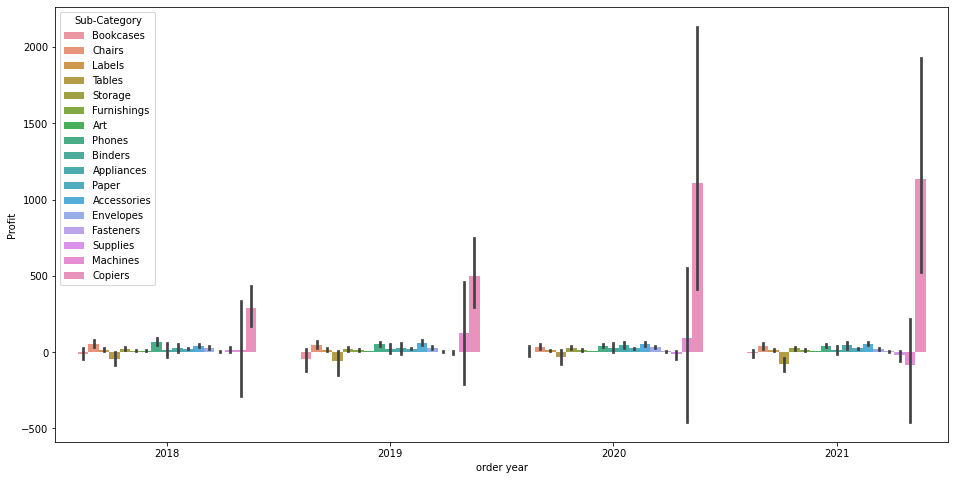

In [141]:
fig=plt.figure(figsize=(16,8))
sns.barplot('order year','Profit',hue='Sub-Category',data=df)
plt.show()

In [67]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [68]:
df['order year']=df['Order Date'].dt.year
df['order year'].head()

0    2020
1    2020
2    2020
3    2019
4    2019
Name: order year, dtype: int64

In [75]:
###How much sales do we have on 2018? (Based on order date)###
df.groupby('order year')['Sales'].agg(['sum'])

,sum
order year,
2018,484247.4981
2019,470532.5090
2020,609205.5980
2021,733215.2552


Text(0.5, 1.0, 'Total Sales ')

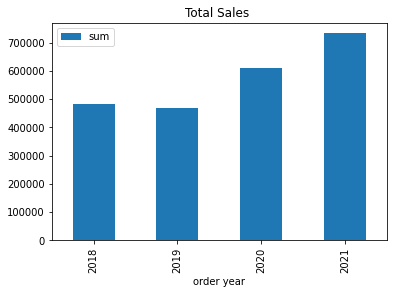

In [142]:
df.groupby('order year')['Sales'].agg(['sum']).plot.bar()
plt.title('Total Sales ')

In [76]:
###Which year has the highest profit? (Based on order date)###
df.groupby('order year')['Profit'].agg(['sum'])

,sum
order year,
2018,49543.9741
2019,61618.6037
2020,81795.1743
2021,93439.2696


Text(0.5, 1.0, 'Total Profit ')

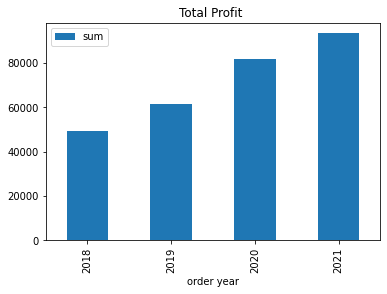

In [143]:
df.groupby('order year')['Profit'].agg(['sum']).plot.bar()
plt.title('Total Profit ')

In [137]:
###What is the result of matrix multiplication a (left) and b (right)? ###
A = np.array([[1,2,3], 
              [4,5,6],
              [7,8,9]])
B = np.array([[2,3,4], 
              [5,6,7],
              [8,9,10]])
print(A*B)

[[ 2  6 12]
 [20 30 42]
 [56 72 90]]


In [99]:
x = 100
print(n * (x+1) / 2)

5050.0


In [145]:
###Let's say we have loop function to calculate sum of all numbers from 1 to a given number. What is the result of sum if we input 100?###
x = int(input())
sum=0
for i in range(x):
  sum=i+sum+1
print(sum)

100
5050
